In [ ]:
# Elaborado por:
# Ana Mantilla : anagmd2019@gmail.com
# Paul Goyes : goyes.yesid@gmail.com

In [ ]:
!git clone https://github.com/Anagabrielamantilla/MineralPrediction.git

Cloning into 'MineralPrediction'...
remote: Enumerating objects: 166, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 166 (delta 37), reused 0 (delta 0), pack-reused 96
Receiving objects: 100% (166/166), 12.66 MiB | 13.92 MiB/s, done.
Resolving deltas: 100% (57/57), done.


**ANÁLISIS DE COMPONENTES PRINCIPALES CON NUEVE VARIABLES DE ENTRADA**

In [ ]:
# Conectarse a Google Drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Importar librerías

import gdal
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
fn = '/content/drive/MyDrive/TESIS/salidas-graficas/nueve-pca/'

In [ ]:
v1 = gdal.Open('/content/drive/MyDrive/Colab Notebooks/TESIS/VIRTUAL-RASTER/04_Virtual_Raster.tif')
col   = v1.RasterXSize
rows  = v1.RasterYSize
nelem = col*rows
print(rows, col)

In [ ]:
# #Ejecutar solo para comprobar

v1val = v1.GetRasterBand(9).ReadAsArray().flatten()
NanValues = np.where(v1val == -9999)[0]
v1val[NanValues]=None


plt.imshow(v1val.reshape(rows,col),cmap='jet')
plt.colorbar()

In [ ]:
#PASO 2: EXTRAER LOS VALORES

v1val = v1.GetRasterBand(1).ReadAsArray().flatten()
v2val = v1.GetRasterBand(2).ReadAsArray().flatten()
v3val = v1.GetRasterBand(3).ReadAsArray().flatten()
v4val = v1.GetRasterBand(4).ReadAsArray().flatten()
v5val = v1.GetRasterBand(5).ReadAsArray().flatten()
v6val = v1.GetRasterBand(6).ReadAsArray().flatten()
v7val = v1.GetRasterBand(7).ReadAsArray().flatten()
v8val = v1.GetRasterBand(8).ReadAsArray().flatten()
v9val = v1.GetRasterBand(9).ReadAsArray().flatten()


In [ ]:
#PASO 3: ENCONTRAR LAS POSICIONES Nan Y ELIMINARLAS

NanValues = np.where(v1val == -9999)[0]

DATA = np.stack((v1val,v2val,v3val,v4val,v5val,v6val,v7val,v8val,v9val),axis=1)

cP        = np.arange(0,nelem)
cPP       = np.delete(cP, NanValues, axis=0)

XX = np.delete(DATA, NanValues, axis=0)

In [ ]:
# Paso 4: Estandarizar los valores

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(XX)

n_components= 9
pca = PCA(n_components)
PC12 = pca.fit_transform(x)
print("The explained variance for "+ str(n_components) + " PC is: ", np.sum(pca.explained_variance_ratio_))

The explained variance for 9 PC is:  0.9999999999999999


***Una vez se garantiza el número de componentes principales necesarios para los datos, se procede a transformar los mapas predictores***

## **Transformación de los componentes principales a ráster**

In [ ]:
####################################################
# Paso 5: Escribir los datos PCA en el dato raster
####################################################

driver = v1.GetDriver()

## PC1
pca1 = driver.Create(fn + "PC1" + ".tif", col, rows, 1, gdal.GDT_Float32)
# Write metadata
pca1.SetGeoTransform(v1.GetGeoTransform())
pca1.SetProjection(v1.GetProjection())

pca1dataarray = np.zeros((rows,col)).flatten()

for i in range(cPP.shape[0]):
    pca1dataarray[cPP[i]]=PC12[i,0] #esto cambia según corresponda
    
for i in range(NanValues.shape[0]):
    pca1dataarray[NanValues[i]]=-9999

pca1.GetRasterBand(1).WriteArray(pca1dataarray.reshape(rows,col))
pca1.GetRasterBand(1).SetNoDataValue(-9999)
pca1 = None
del pca1

In [ ]:
## PC2
pca2 = driver.Create(fn + "PC2" + ".tif", col, rows, 1, gdal.GDT_Float32)
# Write metadata
pca2.SetGeoTransform(v1.GetGeoTransform())
pca2.SetProjection(v1.GetProjection())

pca2dataarray = np.zeros((rows,col)).flatten()

for i in range(cPP.shape[0]):
    pca2dataarray[cPP[i]]=PC12[i,1]#esto cambia según corresponda
    
for i in range(NanValues.shape[0]):
    pca2dataarray[NanValues[i]]=-9999

pca2.GetRasterBand(1).WriteArray(pca2dataarray.reshape(rows,col))
pca2.GetRasterBand(1).SetNoDataValue(-9999)
pca2 = None
del pca2

In [ ]:
## PC3
pca3 = driver.Create(fn + "PC3" + ".tif", col, rows, 1, gdal.GDT_Float32)
# Write metadata
pca3.SetGeoTransform(v1.GetGeoTransform())
pca3.SetProjection(v1.GetProjection())

pca3dataarray = np.zeros((rows,col)).flatten()

for i in range(cPP.shape[0]):
    pca3dataarray[cPP[i]]=PC12[i,2]#esto cambia según corresponda
    
for i in range(NanValues.shape[0]):
    pca3dataarray[NanValues[i]]=-9999

pca3.GetRasterBand(1).WriteArray(pca3dataarray.reshape(rows,col))
pca3.GetRasterBand(1).SetNoDataValue(-9999)
pca3 = None
del pca3

In [ ]:
## PC4
pca4 = driver.Create(fn + "PC4" + ".tif", col, rows, 1, gdal.GDT_Float32)
# Write metadata
pca4.SetGeoTransform(v1.GetGeoTransform())
pca4.SetProjection(v1.GetProjection())

pca4dataarray = np.zeros((rows,col)).flatten()

for i in range(cPP.shape[0]):
    pca4dataarray[cPP[i]]=PC12[i,3]#esto cambia según corresponda
    
for i in range(NanValues.shape[0]):
    pca4dataarray[NanValues[i]]=-9999

pca4.GetRasterBand(1).WriteArray(pca4dataarray.reshape(rows,col))
pca4.GetRasterBand(1).SetNoDataValue(-9999)
pca4 = None
del pca4

In [ ]:
## PC5
pca5 = driver.Create(fn + "PC5" + ".tif", col, rows, 1, gdal.GDT_Float32)
# Write metadata
pca5.SetGeoTransform(v1.GetGeoTransform())
pca5.SetProjection(v1.GetProjection())

pca5dataarray = np.zeros((rows,col)).flatten()

for i in range(cPP.shape[0]):
    pca5dataarray[cPP[i]]=PC12[i,4]#esto cambia según corresponda
    
for i in range(NanValues.shape[0]):
    pca5dataarray[NanValues[i]]=-9999

pca5.GetRasterBand(1).WriteArray(pca5dataarray.reshape(rows,col))
pca5.GetRasterBand(1).SetNoDataValue(-9999)
pca5 = None
del pca5

In [ ]:
## PC6
pca6 = driver.Create(fn + "PC6" + ".tif", col, rows, 1, gdal.GDT_Float32)
# Write metadata
pca6.SetGeoTransform(v1.GetGeoTransform())
pca6.SetProjection(v1.GetProjection())

pca6dataarray = np.zeros((rows,col)).flatten()

for i in range(cPP.shape[0]):
    pca6dataarray[cPP[i]]=PC12[i,5]#esto cambia según corresponda
    
for i in range(NanValues.shape[0]):
    pca6dataarray[NanValues[i]]=-9999

pca6.GetRasterBand(1).WriteArray(pca6dataarray.reshape(rows,col))
pca6.GetRasterBand(1).SetNoDataValue(-9999)
pca6 = None
del pca6

In [ ]:
## PC7
pca7 = driver.Create(fn + "PC7" + ".tif", col, rows, 1, gdal.GDT_Float32)
# Write metadata
pca7.SetGeoTransform(v1.GetGeoTransform())
pca7.SetProjection(v1.GetProjection())

pca7dataarray = np.zeros((rows,col)).flatten()

for i in range(cPP.shape[0]):
    pca7dataarray[cPP[i]]=PC12[i,6]#esto cambia según corresponda
    
for i in range(NanValues.shape[0]):
    pca7dataarray[NanValues[i]]=-9999

pca7.GetRasterBand(1).WriteArray(pca7dataarray.reshape(rows,col))
pca7.GetRasterBand(1).SetNoDataValue(-9999)
pca7 = None
del pca7

In [ ]:
## PC8
pca8 = driver.Create(fn + "PC8" + ".tif", col, rows, 1, gdal.GDT_Float32)
# Write metadata
pca8.SetGeoTransform(v1.GetGeoTransform())
pca8.SetProjection(v1.GetProjection())

pca8dataarray = np.zeros((rows,col)).flatten()

for i in range(cPP.shape[0]):
    pca8dataarray[cPP[i]]=PC12[i,7]#esto cambia según corresponda
    
for i in range(NanValues.shape[0]):
    pca8dataarray[NanValues[i]]=-9999

pca8.GetRasterBand(1).WriteArray(pca8dataarray.reshape(rows,col))
pca8.GetRasterBand(1).SetNoDataValue(-9999)
pca8 = None
del pca8

In [ ]:
## PC9
pca9 = driver.Create(fn + "PC9" + ".tif", col, rows, 1, gdal.GDT_Float32)
# Write metadata
pca9.SetGeoTransform(v1.GetGeoTransform())
pca9.SetProjection(v1.GetProjection())

pca9dataarray = np.zeros((rows,col)).flatten()

for i in range(cPP.shape[0]):
    pca9dataarray[cPP[i]]=PC12[i,8]#esto cambia según corresponda
    
for i in range(NanValues.shape[0]):
    pca9dataarray[NanValues[i]]=-9999

pca9.GetRasterBand(1).WriteArray(pca9dataarray.reshape(rows,col))
pca9.GetRasterBand(1).SetNoDataValue(-9999)
pca9 = None
del pca9

In [ ]:
# ## PC10
# pca10 = driver.Create(fn + "PC10" + ".tif", col, rows, 1, gdal.GDT_Float32)
# # Write metadata
# pca10.SetGeoTransform(v1.GetGeoTransform())
# pca10.SetProjection(v1.GetProjection())

# pca10dataarray = np.zeros((rows,col)).flatten()

# for i in range(cPP.shape[0]):
#     pca10dataarray[cPP[i]]=PC12[i,9]#esto cambia según corresponda
    
# for i in range(NanValues.shape[0]):
#     pca10dataarray[NanValues[i]]=-9999

# pca10.GetRasterBand(1).WriteArray(pca10dataarray.reshape(rows,col))
# pca10.GetRasterBand(1).SetNoDataValue(-9999)
# pca10 = None
# del pca10

In [ ]:
# ## PC11
# pca11 = driver.Create(fn + "PC11" + ".tif", col, rows, 1, gdal.GDT_Float32)
# # Write metadata
# pca11.SetGeoTransform(v1.GetGeoTransform())
# pca11.SetProjection(v1.GetProjection())

# pca11dataarray = np.zeros((rows,col)).flatten()

# for i in range(cPP.shape[0]):
#     pca11dataarray[cPP[i]]=PC12[i,10]#esto cambia según corresponda
    
# for i in range(NanValues.shape[0]):
#     pca11dataarray[NanValues[i]]=-9999

# pca11.GetRasterBand(1).WriteArray(pca11dataarray.reshape(rows,col))
# pca11.GetRasterBand(1).SetNoDataValue(-9999)
# pca11 = None
# del pca11

# **Cálculo del porcentaje de varianza explicada acumulada**

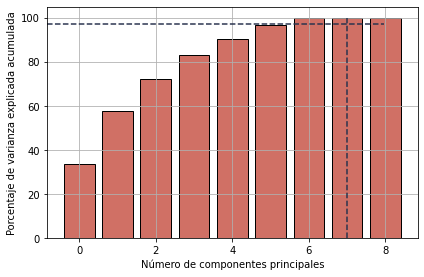

In [ ]:
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
#
# Create the visualization plot
#
#plt.plot(range(0,len(pca.explained_variance_ratio_)), (pca.explained_variance_ratio_)*100, 
    #   label='Varianza explicada', color = 'black')

plt.bar(range(0,len(pca.explained_variance_ratio_)), (cum_sum_eigenvalues)*100,
        color='#cb6154e6',label='Varianza explicada acumulada', align='center',edgecolor='black')

#plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Varianza explicada acumulada')

plt.ylabel('Porcentaje de varianza explicada acumulada', fontsize=10)
plt.xlabel('Número de componentes principales', fontsize=10)
plt.tight_layout()
plt.grid(True)
plt.axvline(x = 7, ymin = 0, ymax = 0.95, color = '#29334eff', label = 'axvline - full height', linestyle = '--')
plt.axhline(y = 97, xmin = 0, xmax = 0.91, color = '#29334eff', linestyle = '--')